# 2025 Colorado State University Hackathon Starter Notebook

This notebook will offer an example for loading geospatial data into a potentially desirable format that can be used for completing the challenges.

_________________________________

In [1]:
import rasterio
import matplotlib.pyplot as plt 

In [2]:
hillshade_path = "Lidar_DEM_Hillshade/South_Clear_Creek_BareEarth_Hillshade_1m.tif"
with rasterio.open(hillshade_path) as hillshade_dataset:
    # Read in the .tif file as a numpy array
    hillshade = hillshade_dataset.read()
    
    ### Special properties of the .tif file ###
    
    # Bands are similar to channels in an image, depending on the sensor data 
    # from a satellite there could be many different spectral bands
    print(f'Number of bands in the tiff file: {hillshade_dataset.count}') 
    
    # This is geospatial data so we use a coordinate reference system 
    # to map the data to its location on earth
    print(f'Coordinate Reference System: {hillshade_dataset.crs}')
    
    # From the georeference point set from the crs, we can see the size of
    # the earth that our sample covers in meters
    print(f'Bounds of our sample: {hillshade_dataset.bounds}')
    
# We now have a numpy array that we can manipulate
print(f'Format of sample: {type(hillshade)}')
print(f'Size of sample array: {hillshade.shape}')

Number of bands in the tiff file: 1
Coordinate Reference System: COMPD_CS["NAD83(2011) / UTM zone 13N + NAVD88 height",PROJCS["NAD83(2011) / UTM zone 13N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6342"]],VERT_CS["NAVD88 height",VERT_DATUM["North American Vertical Datum 1988",2005,AUTHORITY["EPSG","5103"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Gravity-related height",UP],AUTHORITY["EPSG","5703"]]]
Bounds of our sample: Boundin

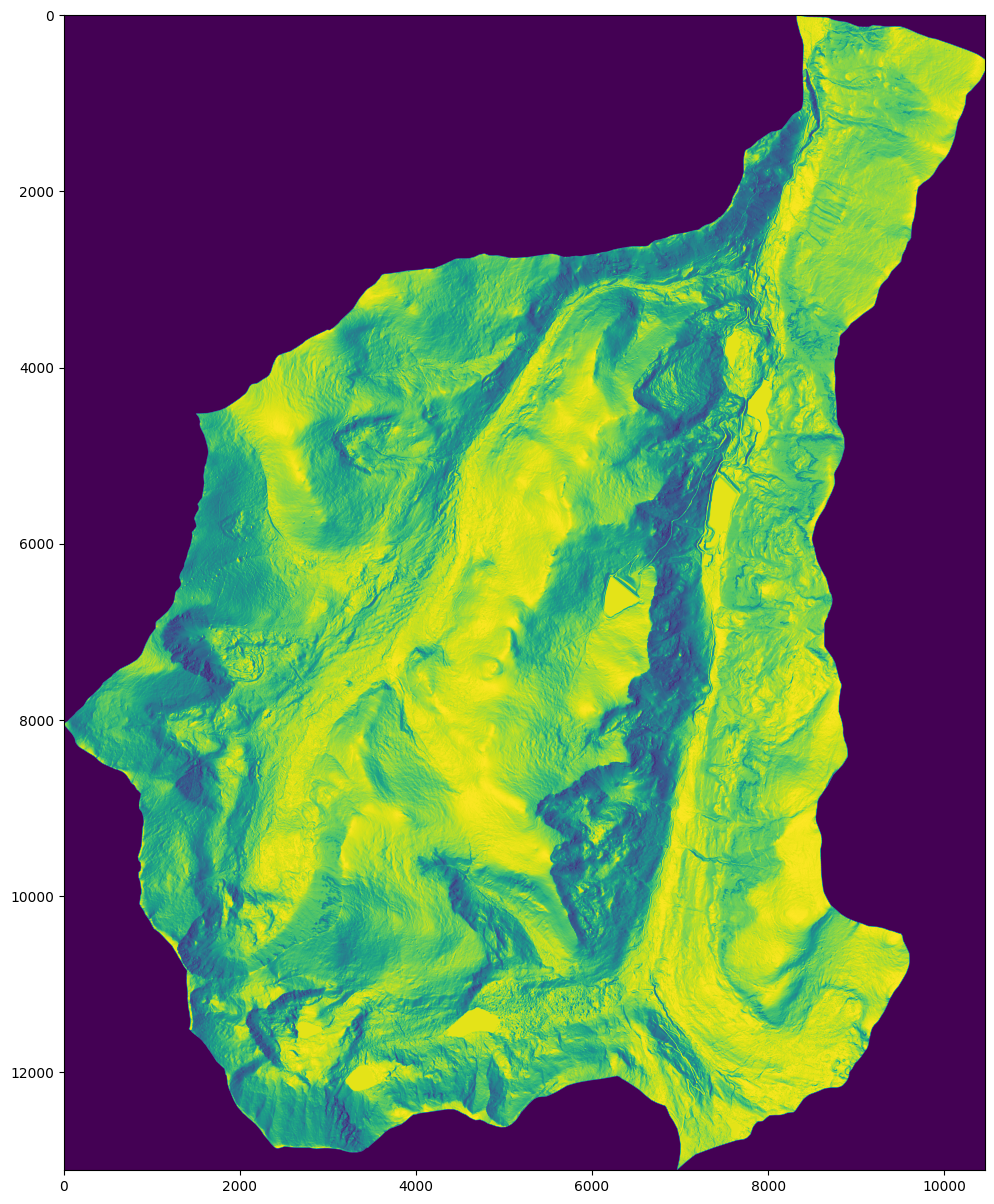

In [3]:
# View an image of the entire array
plt.figure(figsize=(15, 15))
plt.imshow(hillshade.transpose(1, 2, 0))
plt.show()

In [4]:
# Follow the same process to load the roads
roads_path = "Roads_Boundary/South_Clear_Creek_Roads_Mask.tif"
with rasterio.open(roads_path) as roads_dataset:
    roads_mask = roads_dataset.read()
plt.figure(figsize=(15,15))
plt.imshow(roads_mask.transpose(1, 2, 0))
plt.show()